In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['class']=data['class'].map({'ham':0, 'spam':1})

In [8]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=data['message']
y=data['class']

In [36]:
np.size(X)
np.size(y)

5572

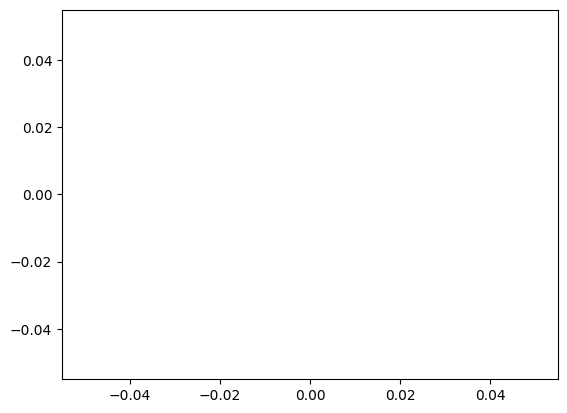

In [40]:
plt.plot(scalex='X',scaley='y',type='bar',color='red')
plt.show()

In [12]:
X.shape

(5572,)

In [13]:
y.shape

(5572,)

In [14]:
data.isnull().sum()

class      0
message    0
dtype: int64

In [15]:
cv=CountVectorizer()

In [16]:
X=cv.fit_transform(X)

In [17]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
x_train.shape

(4457, 8672)

In [19]:
x_test.shape

(1115, 8672)

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
model=MultinomialNB()

In [22]:
model.fit(x_train, y_train)

MultinomialNB()

In [23]:
model.score(x_test, y_test)

0.97847533632287

In [24]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [25]:
vect

array([[0, 0, 0, ..., 0, 0, 0]])

In [26]:
import pickle
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))


In [27]:
import pickle
pickle.dump(cv, open('vec.pkl','wb'))
#model1 = pickle.load(open('spam.pkl','rb'))